<a href="https://colab.research.google.com/github/MostafaJahanian/Free_Projects/blob/main/CIFAR10_Dataset_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import random

### Loading Dataset From Keras 

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [3]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
len(np.unique(train_labels))

10

In [5]:
# copied from keras api
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' ,'frog', 'horse', 'ship' ,'truck']

### Getting Data Ready for Training

In [6]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.1, shuffle = True, random_state = 1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((45000, 32, 32, 3), (45000, 1), (5000, 32, 32, 3), (5000, 1))

In [7]:
y_train = y_train.flatten()
y_val = y_val.flatten()
y_test = test_labels.flatten()

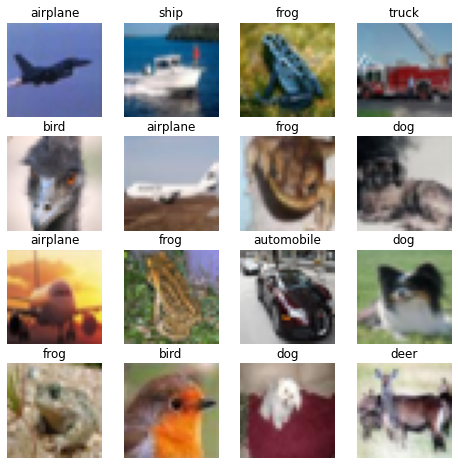

In [8]:
# plotting random images from the train data
plt.figure(figsize = (8, 8))
for i in range(16):
  index = random.randint(0, len(X_train))
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(X_train[index])
  plt.title(class_names[y_train[index]])
  plt.axis(False)

In [9]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.reshape(len(X_train), 32*32*3)).reshape(X_train.shape)
X_train_scaled.shape

(45000, 32, 32, 3)

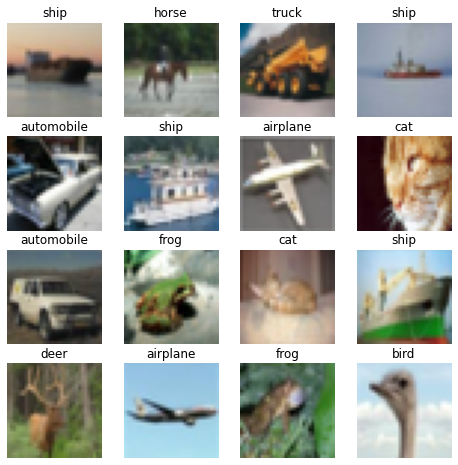

In [10]:
# plotting random images from the normalized train data
plt.figure(figsize = (8, 8))
for i in range(16):
  index = random.randint(0, len(X_train_scaled))
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(X_train_scaled[index])
  plt.title(class_names[y_train[index]])
  plt.axis(False)

In [11]:
X_val_scaled = scaler.transform(X_val.reshape(len(X_val), 32*32*3)).reshape(X_val.shape)
X_test_scaled = scaler.transform(test_images.reshape(len(test_images), 32*32*3)).reshape(test_images.shape)
X_val_scaled.shape, X_test_scaled.shape

((5000, 32, 32, 3), (10000, 32, 32, 3))

### Training CNN on the Data

Model 1:

--- Conv2D layer, 40 filters of size 3, same padding, relu activation

--- MaxPooling2D layer, pool size = 2

--- Flatten layer

--- Dense layer, 500 units, relu activation

--- Dense layer, Output, 10 units, softmax activation

--- Adam optimzier, default learning rate

--- 20 epochs

In [12]:
tf.random.set_seed(42)

cnn_1 = keras.Sequential([
    layers.Conv2D(filters = 40, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn_1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_1 = cnn_1.fit(X_train_scaled, y_train, epochs = 20, validation_data = (X_val_scaled, y_val))

Epoch 1/20
1407/1407 [==============================] - 12s 5ms/step - loss: 1.4233 - accuracy: 0.4936 - val_loss: 1.2023 - val_accuracy: 0.5724
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0972 - accuracy: 0.6135 - val_loss: 1.0982 - val_accuracy: 0.6078
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9461 - accuracy: 0.6658 - val_loss: 1.0220 - val_accuracy: 0.6394
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8082 - accuracy: 0.7176 - val_loss: 1.0223 - val_accuracy: 0.6532
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6791 - accuracy: 0.7615 - val_loss: 1.0602 - val_accuracy: 0.6444
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5606 - accuracy: 0.8036 - val_loss: 1.0506 - val_accuracy: 0.6614
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4490 - accuracy: 0.8452 - val_loss: 1.1260 - val_accuracy

In [13]:
def plot_training_curves(history_df):
  plt.figure(figsize = (13, 4), dpi = 120)
  ax = plt.subplot(1, 2, 1)
  plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
  plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Cross Entropy')
  plt.grid()
  plt.legend()
  ax = plt.subplot(1, 2, 2) 
  plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
  plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid()
  plt.legend()
  plt.show()

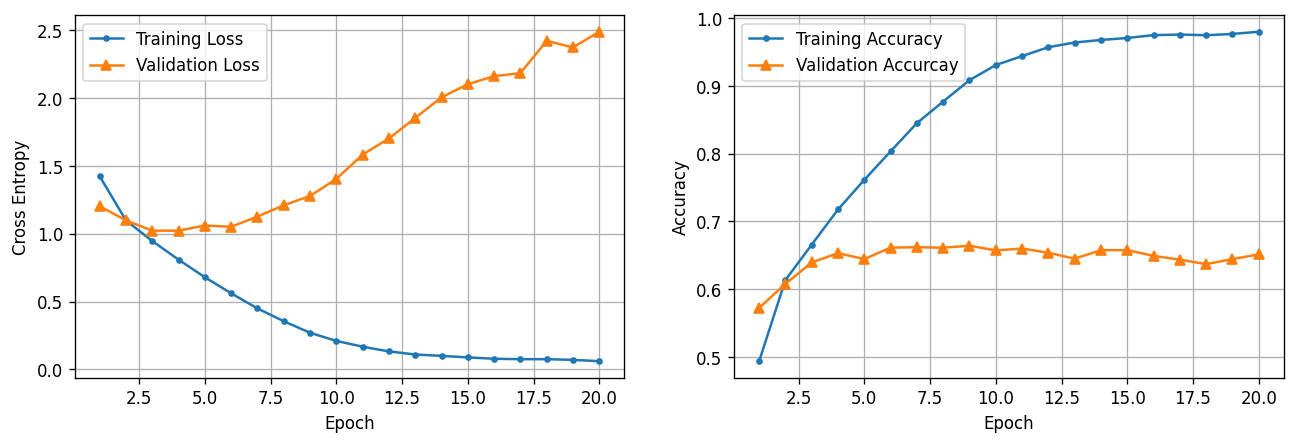

In [14]:
plot_training_curves(pd.DataFrame(history_1.history))

--- Based on the plots above, this model is overfitted as validation curves do not follow those of training. Aiming to tackle this, Dropout layer will be added to the model.

Model 2:

--- Conv2D layer, 40 filters of size 3, same padding, relu activation

--- MaxPooling2D layer, pool size = 2

--- Flatten layer

--- **Dropout layer of rate 0.3**

--- Dense layer, 500 units, relu activation

--- Dense layer, Output, 10 units, softmax activation

--- Adam optimzier, default learning rate

--- 20 epochs

In [15]:
tf.random.set_seed(42)

cnn_2 = keras.Sequential([
    layers.Conv2D(filters = 40, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn_2.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_2 = cnn_2.fit(X_train_scaled, y_train, epochs = 20, validation_data = (X_val_scaled, y_val))

Epoch 1/20
1407/1407 [==============================] - 7s 4ms/step - loss: 1.4559 - accuracy: 0.4811 - val_loss: 1.2306 - val_accuracy: 0.5714
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1526 - accuracy: 0.5915 - val_loss: 1.1150 - val_accuracy: 0.6068
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0198 - accuracy: 0.6395 - val_loss: 1.0577 - val_accuracy: 0.6218
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9076 - accuracy: 0.6799 - val_loss: 1.0318 - val_accuracy: 0.6408
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8012 - accuracy: 0.7150 - val_loss: 0.9938 - val_accuracy: 0.6556
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7128 - accuracy: 0.7486 - val_loss: 1.0024 - val_accuracy: 0.6560
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6213 - accuracy: 0.7790 - val_loss: 0.9961 - val_accuracy:

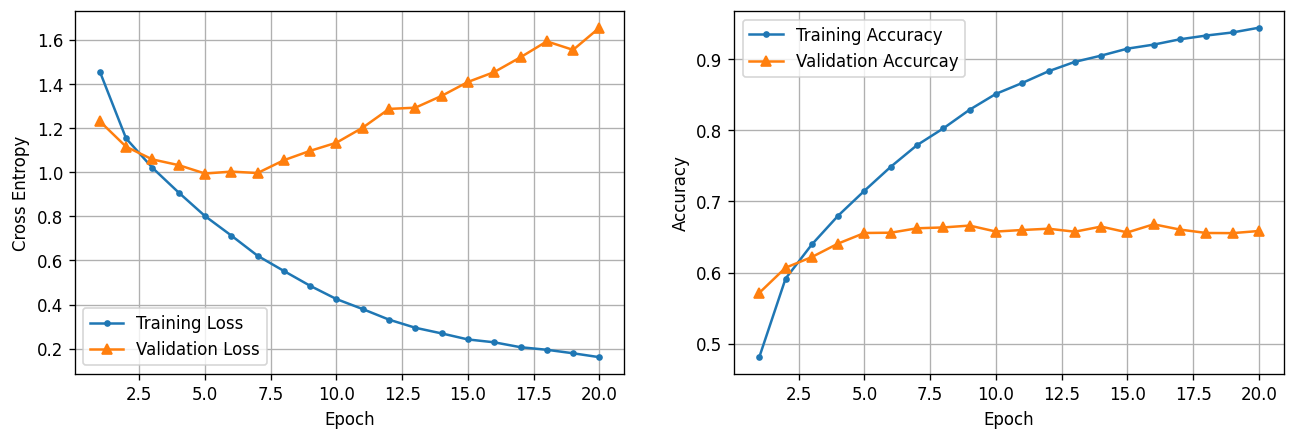

In [16]:
plot_training_curves(pd.DataFrame(history_2.history))

--- Although the second model improved to some extent, specially regarding loss curve, it is not no way near satisfactory.

Model 3:

--- Conv2D layer, 40 filters of size 3, same padding, relu activation

--- MaxPooling2D layer, pool size = 2

--- **Conv2D layer, 20 filters of size 2, same padding, relu activation**

--- **MaxPooling2D layer of pool size 2**

--- Flatten layer

--- Dropout layer of rate 0.3

--- Dense layer, 500 units, relu activation

--- Dense layer, Output, 10 units, softmax activation

--- Adam optimzier, default learning rate

--- 20 epochs

In [17]:
tf.random.set_seed(42)

cnn_3 = keras.Sequential([
    layers.Conv2D(filters = 40, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 20, kernel_size = 2, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn_3.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_3 = cnn_3.fit(X_train_scaled, y_train, epochs = 20, validation_data = (X_val_scaled, y_val))

Epoch 1/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4774 - accuracy: 0.4681 - val_loss: 1.2551 - val_accuracy: 0.5594
Epoch 2/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1629 - accuracy: 0.5872 - val_loss: 1.0747 - val_accuracy: 0.6178
Epoch 3/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0283 - accuracy: 0.6371 - val_loss: 0.9859 - val_accuracy: 0.6518
Epoch 4/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9123 - accuracy: 0.6790 - val_loss: 0.9235 - val_accuracy: 0.6806
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8195 - accuracy: 0.7113 - val_loss: 0.9038 - val_accuracy: 0.6826
Epoch 6/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7416 - accuracy: 0.7385 - val_loss: 0.8357 - val_accuracy: 0.7064
Epoch 7/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6704 - accuracy: 0.7638 - val_loss: 0.8168 - val_accuracy:

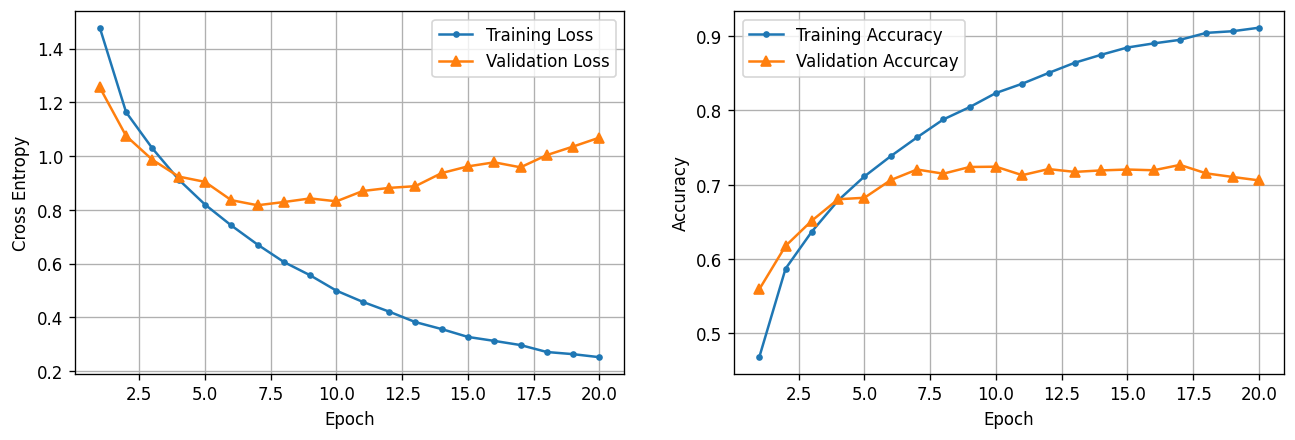

In [18]:
plot_training_curves(pd.DataFrame(history_3.history))

--- Adding another Conv2D layer along with a MaxPooling2D, resulted in a significant improvement of the model. Now adding another *Dropout* layer may help with achieving the result we want.

Model 4:

--- Conv2D layer, 40 filters of size 3, same padding, relu activation

--- MaxPooling2D layer, pool size = 2

--- Conv2D layer, 20 filters of size 2, same padding, relu activation

--- MaxPooling2D layer of pool size 2

--- Flatten layer

--- Dropout layer of rate 0.3

--- Dense layer, 500 units, relu activation

--- **Dropout layer of rate 0.3**

--- Dense layer, Output, 10 units, softmax activation

--- Adam optimzier, default learning rate

--- 20 epochs

In [19]:
tf.random.set_seed(42)

cnn_4 = keras.Sequential([
    layers.Conv2D(filters = 40, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 20, kernel_size = 2, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation = 'softmax')
])

cnn_4.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_4 = cnn_4.fit(X_train_scaled, y_train, epochs = 20, validation_data = (X_val_scaled, y_val))

Epoch 1/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5208 - accuracy: 0.4515 - val_loss: 1.2093 - val_accuracy: 0.5764
Epoch 2/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2121 - accuracy: 0.5700 - val_loss: 1.0821 - val_accuracy: 0.6188
Epoch 3/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0940 - accuracy: 0.6133 - val_loss: 0.9871 - val_accuracy: 0.6534
Epoch 4/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9993 - accuracy: 0.6474 - val_loss: 0.9727 - val_accuracy: 0.6636
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9236 - accuracy: 0.6750 - val_loss: 0.9442 - val_accuracy: 0.6758
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8670 - accuracy: 0.6944 - val_loss: 0.8565 - val_accuracy: 0.7040
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8165 - accuracy: 0.7150 - val_loss: 0.8134 - val_accuracy:

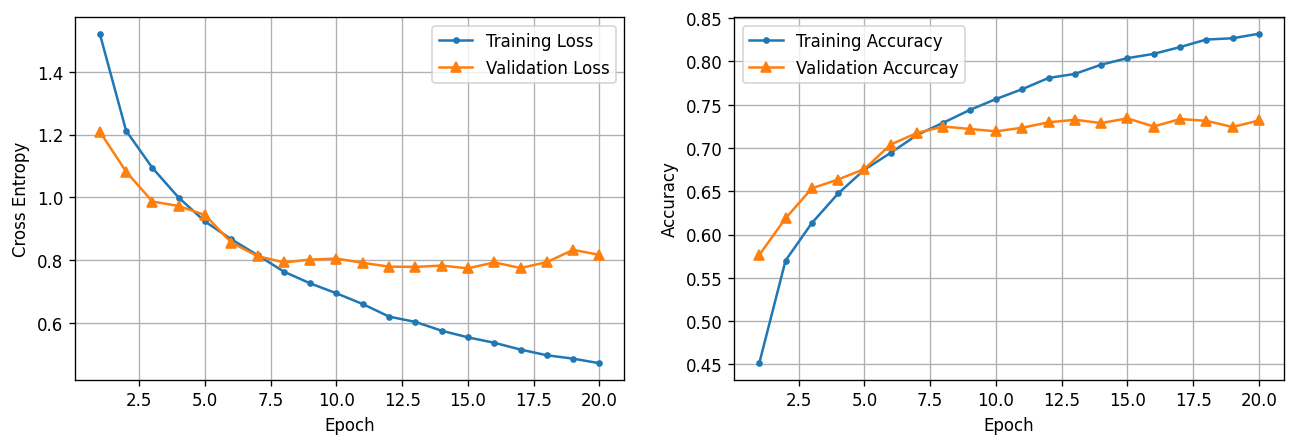

In [20]:
plot_training_curves(pd.DataFrame(history_4.history))

--- Adding an extra dropout layer has a positive effect. Now changing the hyperparameters of layers might be helpful.

Model 5:

--- *This model has gone through trial & error process for fine tuning the hyperparameters of the layers of Model 4.*

--- Conv2D layer, **30 filters** of size 3, same padding, relu activation

--- MaxPooling2D layer, pool size = 2

--- Conv2D layer, **50 filters** of size 2, same padding, relu activation

--- MaxPooling2D layer of pool size 2

--- Flatten layer

--- Dropout layer of **rate 0.4**

--- Dense layer, **800 units**, relu activation

--- Dropout layer of **rate 0.4**

--- Dense layer, Output, 10 units, softmax activation

--- Adam optimzier, default learning rate

--- 20 epochs

In [21]:
tf.random.set_seed(42)

cnn_5 = keras.Sequential([
    layers.Conv2D(filters = 30, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Conv2D(filters = 50, kernel_size = 2, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(800, activation = 'relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation = 'softmax')
])

cnn_5.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_5 = cnn_5.fit(X_train_scaled, y_train, epochs = 20, validation_data = (X_val_scaled, y_val))

Epoch 1/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4648 - accuracy: 0.4723 - val_loss: 1.1603 - val_accuracy: 0.5998
Epoch 2/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1521 - accuracy: 0.5910 - val_loss: 0.9979 - val_accuracy: 0.6478
Epoch 3/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0147 - accuracy: 0.6413 - val_loss: 0.9136 - val_accuracy: 0.6794
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9187 - accuracy: 0.6780 - val_loss: 0.8985 - val_accuracy: 0.6902
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8404 - accuracy: 0.7044 - val_loss: 0.8415 - val_accuracy: 0.7144
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7722 - accuracy: 0.7265 - val_loss: 0.8055 - val_accuracy: 0.7158
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7155 - accuracy: 0.7457 - val_loss: 0.7623 - val_accuracy:

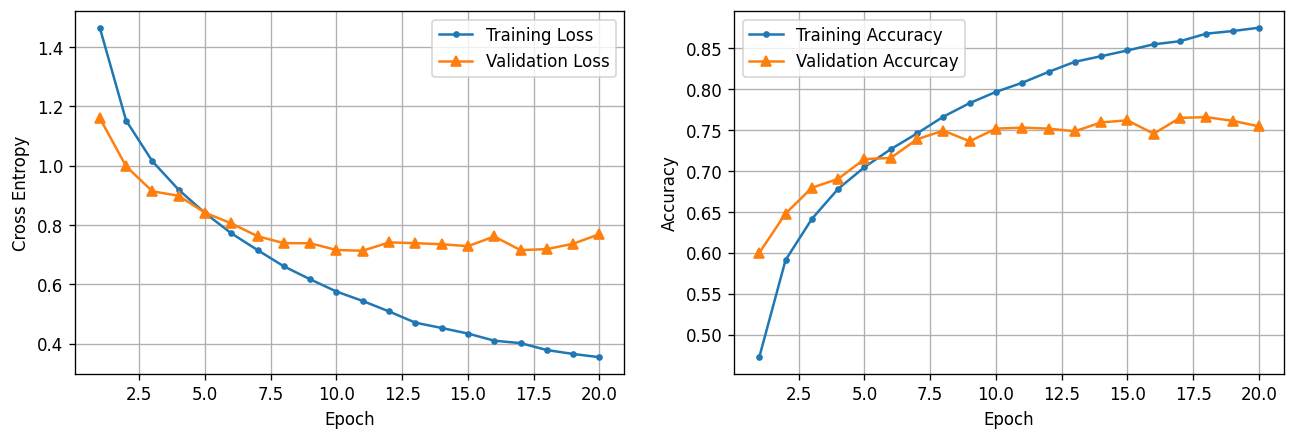

In [22]:
plot_training_curves(pd.DataFrame(history_5.history))

--- Model 5 has better performance than all of the previous models in terms of both loss and accuracy. The only problem is that this model seems incapable of being optimized for meeting considerably higher accuracies than 75-80 percent range !!!